<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/31_quantumTeleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=7f2781eb69728e7aad0eaee0782ebbda1bebf7dc1660d7633507c68933843087
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


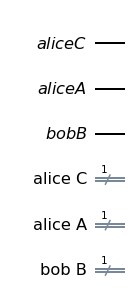

In [ ]:
from qiskit import ClassicalRegister,QuantumRegister, QuantumCircuit
q_C = QuantumRegister(1,name='aliceC')
q_A = QuantumRegister(1,name='aliceA')
q_B = QuantumRegister(1,name='bobB')
c_C = ClassicalRegister(1,name='alice C')
c_A = ClassicalRegister(1,name='alice A')
c_B = ClassicalRegister(1,name='bob B')
qc = QuantumCircuit(q_C,q_A,q_B,c_C,c_A,c_B)
qc.draw('mpl')

## Step 1:

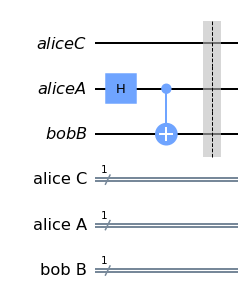

In [ ]:
qc.h(q_A[0])
qc.cx(q_A[0],q_B[0])
qc.barrier()
qc.draw('mpl')

## Step 2:

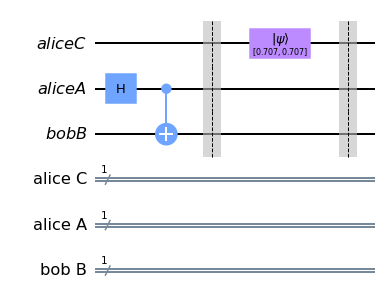

In [ ]:
from math import sqrt
ampl=[1/sqrt(2),1/sqrt(2)]
qc.initialize(ampl,q_C[0])
qc.barrier()
qc.draw('mpl')

## Step 3:

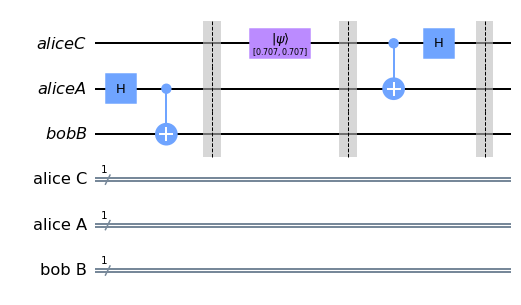

In [ ]:
qc.cx(q_C[0],q_A[0])
qc.h(q_C[0])
qc.barrier()
qc.draw('mpl')

## Step 4:

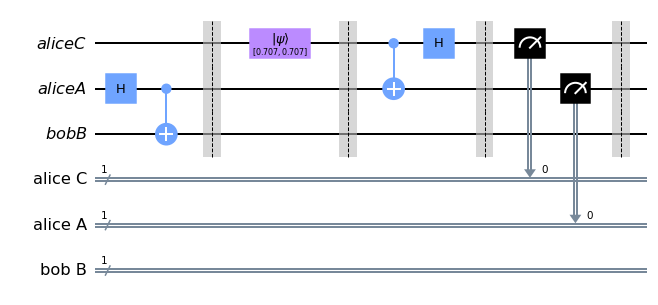

In [ ]:
qc.measure(q_C[0],c_C[0])
qc.measure(q_A[0],c_A[0])
qc.barrier()
qc.draw('mpl')

## Step 5:

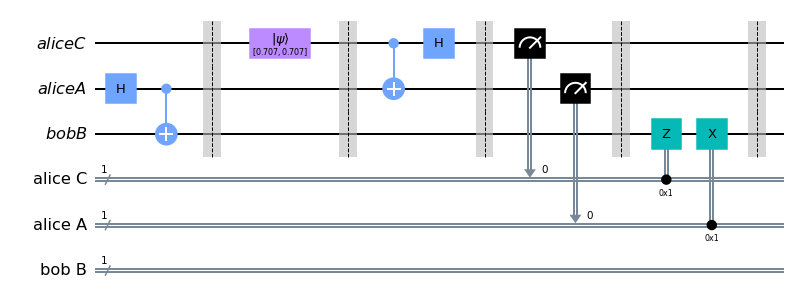

In [ ]:
qc.z(q_B[0]).c_if(c_C,1)
qc.x(q_B[0]).c_if(c_A,1)
qc.barrier()
qc.draw('mpl')

## Result:

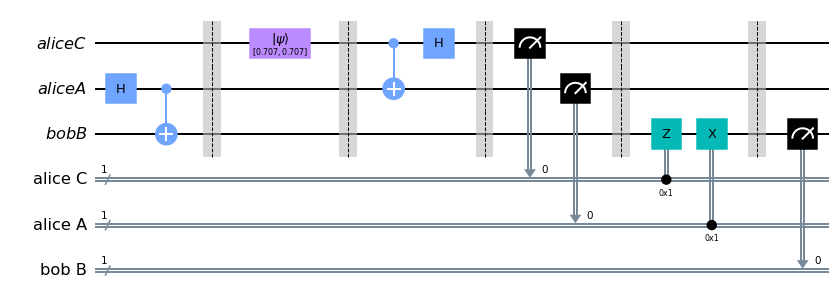

In [ ]:
qc.measure(q_B[0],c_B)
qc.draw('mpl')

## Server:

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0 0 1': 133, '1 0 1': 115, '1 0 0': 112, '1 1 0': 118, '0 1 0': 132, '0 0 0': 124, '1 1 1': 143, '0 1 1': 147}


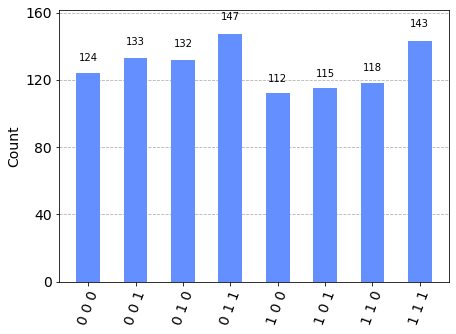

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

**ket(ψ) = a ket(0) + b ket(1)**:

In [ ]:
# Sqrt of the mean value of counts with last qubit on state zero
a = sqrt((counts['0 0 0']+counts['0 0 1']+counts['0 1 0']+counts['0 1 1'])/1024)

In [ ]:
a

0.7234898064243891

In [ ]:
# Sqrt of the mean value of counts with last qubit on state one
b = sqrt((counts['1 0 0']+counts['1 0 1']+counts['1 1 0']+counts['1 1 1'])/1024)

In [ ]:
b

0.6903350635742038

In [ ]:
from qiskit.test.mock import FakeJakarta
device_simulator = FakeJakarta()

<ipython-input-16-4ccbef364900>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeJakarta


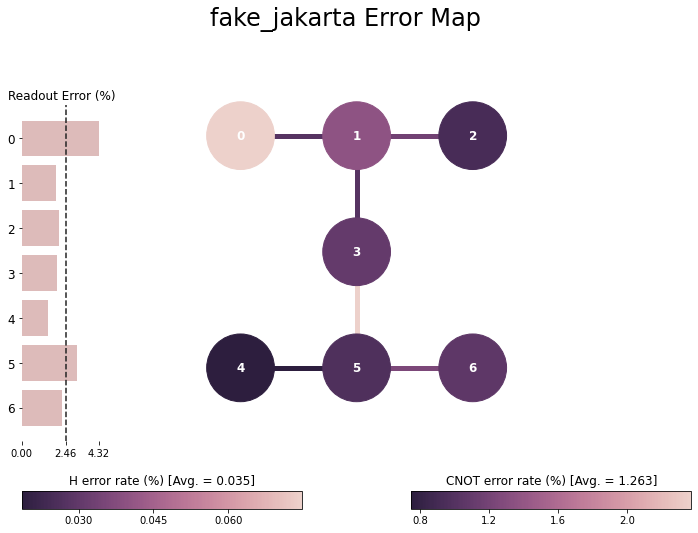

In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

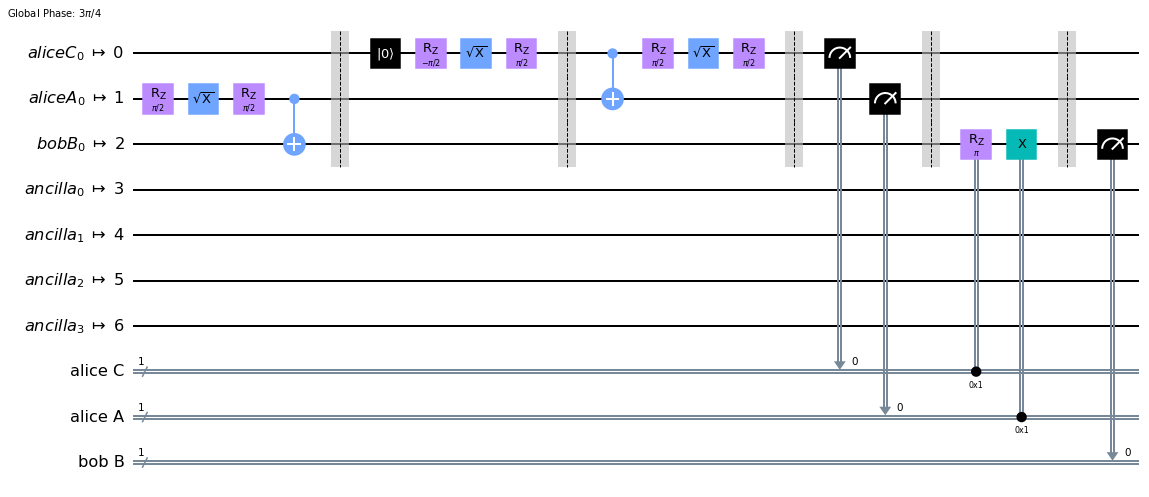

In [ ]:
qc_compiled = transpile(qc,device_simulator)
qc_compiled.draw('mpl')

In [ ]:
job = device_simulator.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1 0 1': 132, '0 0 1': 148, '0 1 1': 128, '1 1 1': 102, '0 0 0': 144, '0 1 0': 144, '1 0 0': 119, '1 1 0': 107}


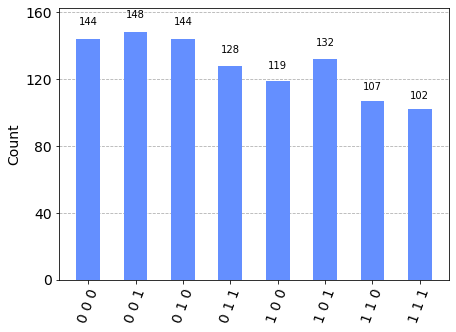

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
a = sqrt((counts['0 0 0']+counts['0 0 1']+counts['0 1 0']+counts['0 1 1'])/1024)

In [ ]:
a

0.7421463804398698

In [ ]:
b = sqrt((counts['1 0 0']+counts['1 0 1']+counts['1 1 0']+counts['1 1 1'])/1024)

In [ ]:
b

0.6702378309227255